# HE (Histogram Equalization) pour l'amélioration d'image

## 1. Introduction

En traitement d'images, l'égalisation d'histogramme est une méthode d'ajustement du contraste d'une image numérique qui utilise l'histogramme. Elle consiste à appliquer une transformation sur chaque pixel de l'image, et donc d'obtenir une nouvelle image à partir d'une opération indépendante sur chacun des pixels. Cette transformation est construite à partir de l'histogramme cumulé de l'image de départ.
   <a title= 'HE' href="https://fr.wikipedia.org/wiki/Égalisation_d%27histogramme">`Source: Histogram Equalization`</a>

L'idée principale est indiquée comme suivante :  

  <img title='demonstration' src='./pic/demo.png' height=200 width=400></img>  

C'est-à-dire on aime bien une distribution de pixel quasiment uniforme, au lieu d'un pic, puisque si c'est un pic, on ne voit pas de contraste. On va le discuter profondamment dans l'expérimentation avec des exemples. Mais avant ça, on discute un peu l'évidence mathématique.
  
Supposons qu'on a une distribution HA(D) sur l'image originale et on veut une distribution HB(D); 
 
  <img title='sta' src='./pic/sta.jpg' height=500 width=500></img>  
  
tout ce qu'on désire est une application f non linéaire de HA à HB, et pour cela on divise le segment D en plusieurs sous-segments(256 normalement). Et puis on fait l'hypothèse que f ne change pas le numbre des pixels dans chaque sous-segment, qui est:
  

  <img title='eq0' src='./pic/eq0.png' height=100 width=300></img>  
  
En particulier on a :
  
  <img title='eq1' src='./pic/eq1.png' height=80 width=200></img> 
  
Pour le cas idéal, on a :
  
  <img title='eq2' src='./pic/eq2.png' height=50 width=100></img>  
  
et A0 est le nombre de pixels, L on prend souvent 256, et puis on a :
  
  <img title='eq3' src='./pic/eq3.png' height=80 width=200></img>  
  
et on obtient f:
  
  <img title='eq4' src='./pic/eq4.png' height=80 width=200></img>  
  
en cas discret, on peut l'écrit comme :
 
  <img title='eq5' src='./pic/eq5.png' height=80 width=180></img>  
  
  
  
  

## 2. Expérimentation

### 2.1 Image grise

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

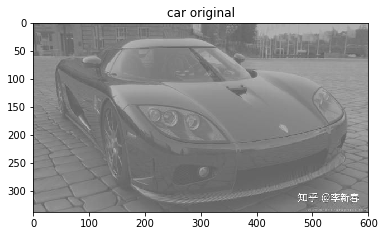

In [2]:
car_path='./pic/car.jpg'                 #lecture d'une image, c'est déja grise
car=cv2.imread(car_path)[:,:,::-1] # attention: dans opencv les images son lites comme BGR, pour une image grise ça va 
plt.imshow(car)                    # mais après on doit le savoir
plt.title('car original')
plt.show()

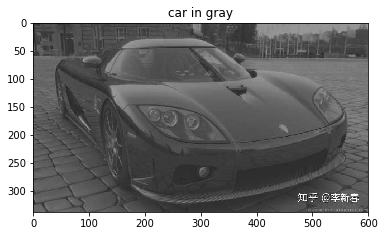

In [3]:
gray_car = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY) #le trasmettre en gris
plt.imshow(gray_car,cmap=plt.cm.gray)
plt.title('car in gray')
plt.show()

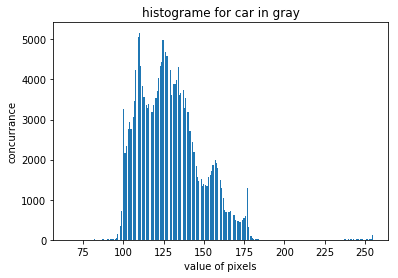

In [4]:
hist_gray_car=gray_car.flatten()                         # utilise flatten pour mettre le MAT en 1 seule dimention
plt.title("histograme for car in gray")
plt.xlabel("value of pixels")
plt.ylabel('concurrance')
plt.hist(hist_gray_car,bins=256)                     # observer l'histograme, qui concentre au centre; c'est la raison pourquoi elle est
plt.show()                                   # si confuse

In [5]:
# réalization of HE 
def hist_equa(img,nbr_bins=256):
    imhist, bins = np.histogram(img.flatten(), nbr_bins)
    cdf = imhist.cumsum() 
    cdf = 255 * cdf /cdf[-1] 
    result = np.interp(img.flatten(),bins[:-1],cdf)
    return result.reshape(img.shape).astype(np.int)

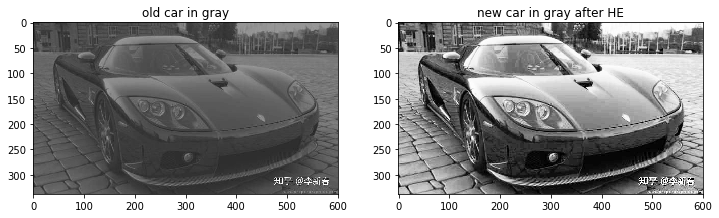

In [6]:
new_img=hist_equa(gray_car)                   # utilise HE pour obtenir une nouvelle image
plt.subplots(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("old car in gray")
plt.imshow(gray_car,cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.title("new car in gray after HE")
plt.imshow(new_img,cmap=plt.cm.gray)
plt.show()                                # plot les 2 images et on peut  les comparer
                                          # on peut voir qu'après HE, l'image est beaucoup claire

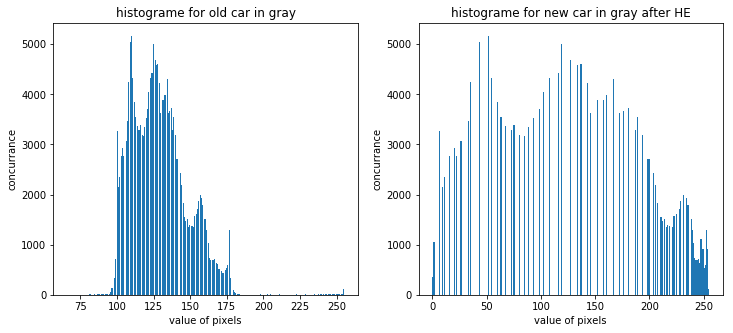

In [7]:
# et puis on plot les histogrammes pour voir l'évaluation

hist_new=new_img.flatten()
plt.subplots(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("histograme for old car in gray")
plt.xlabel("value of pixels")
plt.ylabel('concurrance')
plt.hist(hist_gray_car,bins=256)
plt.subplot(1,2,2)
plt.title("histograme for new car in gray after HE")
plt.xlabel("value of pixels")
plt.ylabel('concurrance')
plt.hist(hist_new,bins=256)
plt.show()

# on peut observer une diminuation de concentration, la distribution est beaucoup plus uniforme qu'avant, qui est cohérant avec 
# notre hypothèse

## 2.2 Colorful image
on a déja fait une expérimentation sur une image grise, mais c'est pas le cas universal dans la vie réelle, au contraire, on traite souvant des images colorées, est-ce que ils sont les mêmes ?

comme on le sait, les images colorées sont composé en 3 channels:RGB, pourtant il y a seulement un pour les grise, qui nous donne la première méthode.

### 2.2.1 Traitement séparé
C'est-à-dire on traite séparament les 3 channels, et puis on les recompose pour obtenir une nouvelle image coloré.

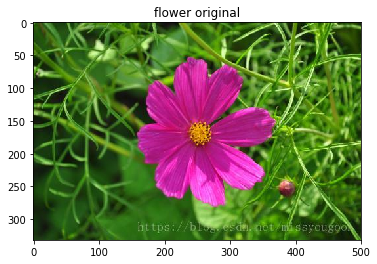

In [8]:
flower_path='./pic/flower.jpg'                  # on prend exemple de cette image 
flower=cv2.imread(flower_path)[:,:,::-1]  # ici l'inverse de chanelle est importante
plt.title("flower original")
plt.imshow(flower)
plt.show()

In [9]:
# comme cette block est répetitivement utilisé, on la mettre comme une fonction
def draw_h(img_o,img_h,i=0):
    h_new=img_h.flatten()
    h=img_o.flatten()
    plt.subplots(figsize=(12, 5))
    plt.subplot(1,2,1)
    plt.title("the {}th channel of old img".format(i))
    plt.xlabel("value of pixels")
    plt.ylabel('concurrance')
    plt.hist(h,bins=256)
    plt.subplot(1,2,2)
    plt.hist(h_new,bins=256)
    plt.title("the {}th channel of new img".format(i))
    plt.xlabel("value of pixels")
    plt.ylabel('concurrance')
    plt.show()

# la définition de HE pour une image coloré
def color_HE(img,draw_hist=True):
    new_img=np.zeros(img.shape)
    for i in range(3):
        new_img[:,:,i]=hist_equa(img[:,:,i])
        if draw_hist: draw_h(img[:,:,i],new_img[:,:,i],i) 
    return new_img.astype(np.int)

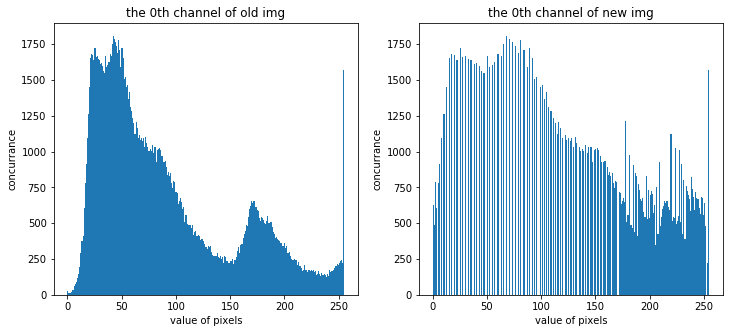

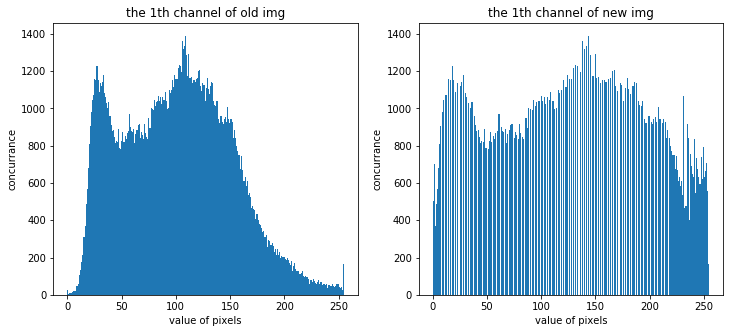

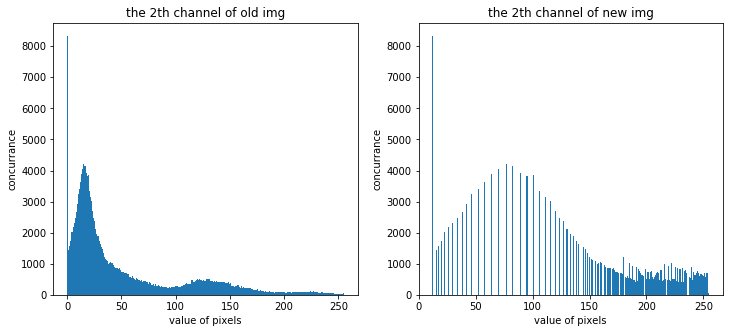

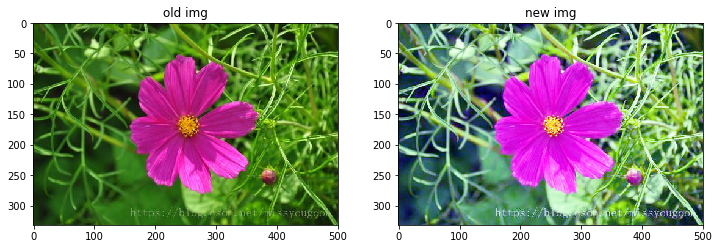

In [10]:
# on va comparer séparament l'histogrammes des 3 channels et ensuite l'image
flower_hist=color_HE(flower)
plt.subplots(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("old img")
plt.imshow(flower)
plt.subplot(1,2,2)
plt.title("new img")
plt.imshow(flower_hist)
plt.show()

`Commentaire`: on peut voir une évidente différence entre les deux, mais cette fois la performence n'est pas si satisfaisante.
on peut voir qu'après HE, l'image est plus claire, même trop claire, certaines colors est trop forte que l'entier devient un peut trop bleu.
la raison est caché dans les comparaisons des 3 channels. on voit que les agandissements des 3 channels est différents. Normalement ils doivent être différent puisque les 3 sont indépendants, et ça cause le problème. On peut observer une augmentation de valeur en bleu que les deux autres.

Est-ce qu'on peut resoudre ce problème ? Non si on insiste sur RGB, mai on peut utiliser une autre manière pour définir une image, qui vient aussi la deuxième méthode


### 2.2.2 Utilisation de YUV
Le modèle YUV ou plus précisément Y'UV définit un espace colorimétrique en trois composantes. La première, Y', représente la luma (à ne pas confondre avec la luminance relative notée Y, le symbole prime de Y' indiquant une correction gamma) et les deux autres, U et V, représentent la chrominance. Y'UV est utilisé dans le système de diffusion télévisuelle PAL. <a title= 'YUV' href="https://fr.wikipedia.org/wiki/YUV">`Source: YUV`</a>

  <img title='YUV' src='./pic/yuv.png' height=100 width=300></img>  

comme la contraste est plutôt influencé par la luminance, tout ce qu'on va faire est de apliquer HE sur le channel Y

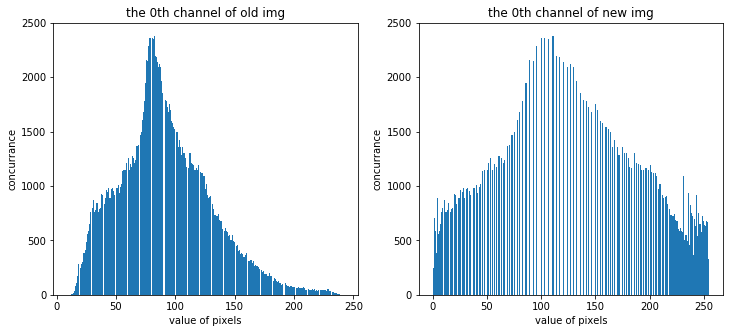

In [11]:
flower_path='./pic/flower.jpg' 
flower=cv2.imread(flower_path)                             # on prend toujours l'exemple de cette image

imgYUV = cv2.cvtColor(flower, cv2.COLOR_BGR2YCrCb)


channelsYUV = cv2.split(imgYUV)
old_h=channelsYUV[0]

channelsYUV[0] = cv2.equalizeHist(channelsYUV[0])
new_h=channelsYUV[0]

channels = cv2.merge(channelsYUV)
result = cv2.cvtColor(channels, cv2.COLOR_YCrCb2BGR)[:,:,::-1]

draw_h(old_h,new_h,i=0)

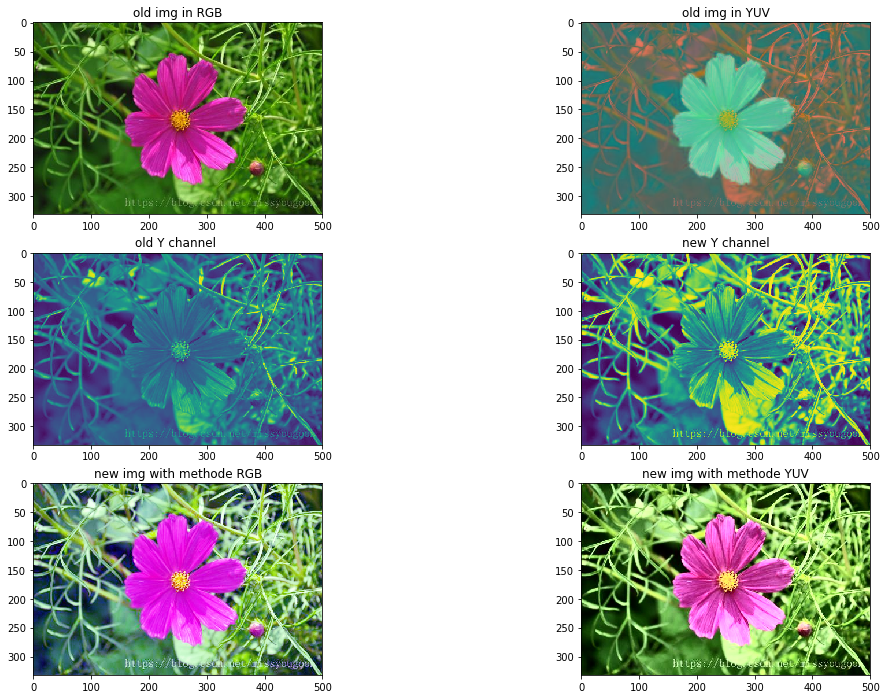

In [12]:

plt.subplots(figsize=(18, 12))
plt.subplot(3,2,3)
plt.title("old Y channel ")
plt.imshow(old_h)
plt.subplot(3,2,4)
plt.title("new Y channel")
plt.imshow(new_h)
plt.subplot(3,2,1)
plt.title("old img in RGB")
plt.imshow(flower[:,:,::-1])
plt.subplot(3,2,2)
plt.title("old img in YUV")
plt.imshow(imgYUV)
plt.subplot(3,2,6)
plt.title("new img with methode YUV")
plt.imshow(result)
plt.subplot(3,2,5)
plt.title("new img with methode RGB")
plt.imshow(flower_hist)
plt.show()


`Commentaire`: avec la méthode YUV, la performence est beaucoup améliorée.